In [ ]:
import tensorflow as tf

In [ ]:
hello = tf.constant('Hello, TensorFlow 2.0!')
print(hello)

tf.Tensor(b'Hello, TensorFlow 2.0!', shape=(), dtype=string)


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

In [ ]:
print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101):
    with tf.GradientTape() as tape:
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b])
    w.assign_sub(learn_rate * dw) # a = a - b
    b.assign_sub(learn_rate * db)

    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62
   3| 0.90| 0.76| 0.55
   5| 0.96| 0.78| 0.19
  10| 1.03| 0.80| 0.02
1000| 1.00| 0.99| 0.00
1100| 1.00| 1.00| 0.00


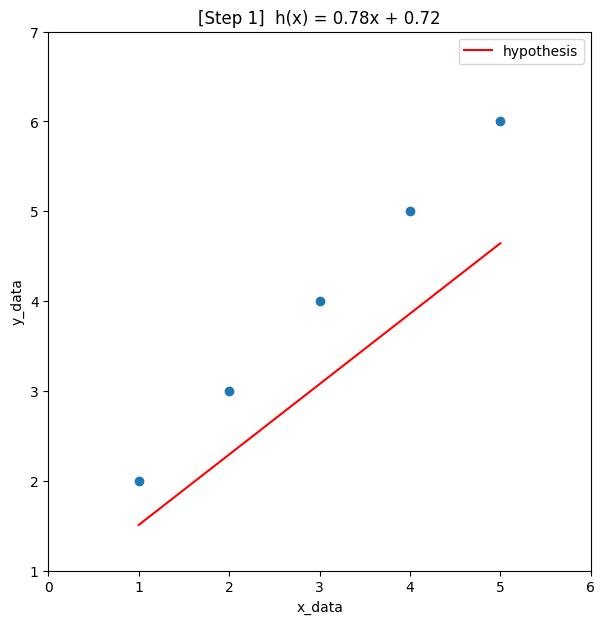

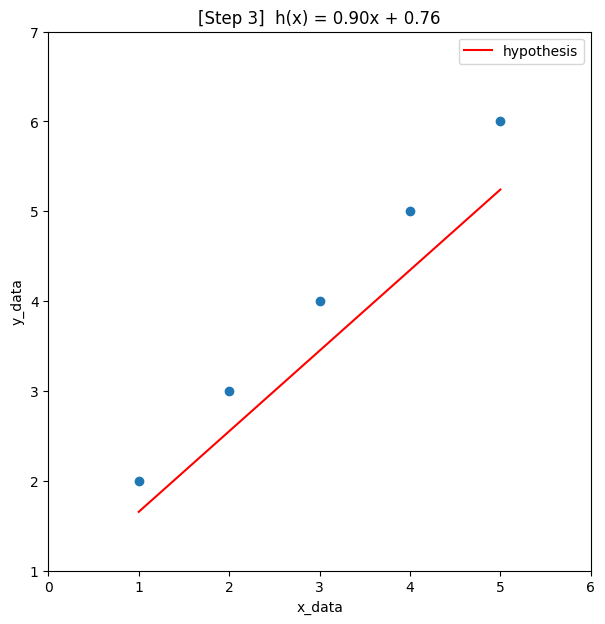

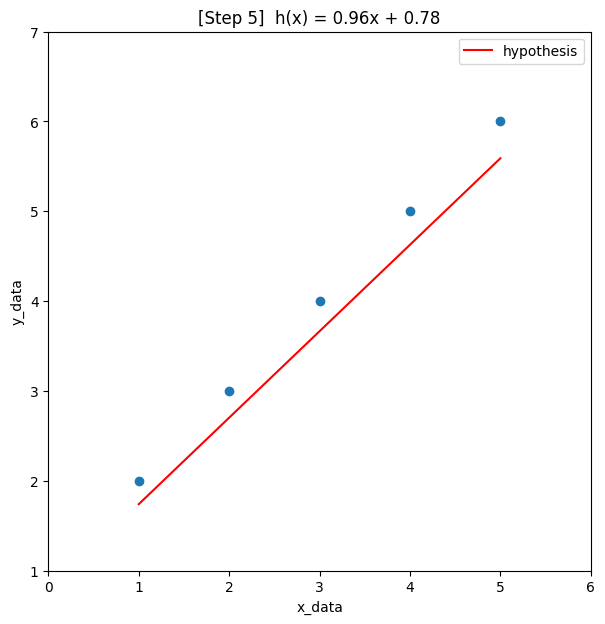

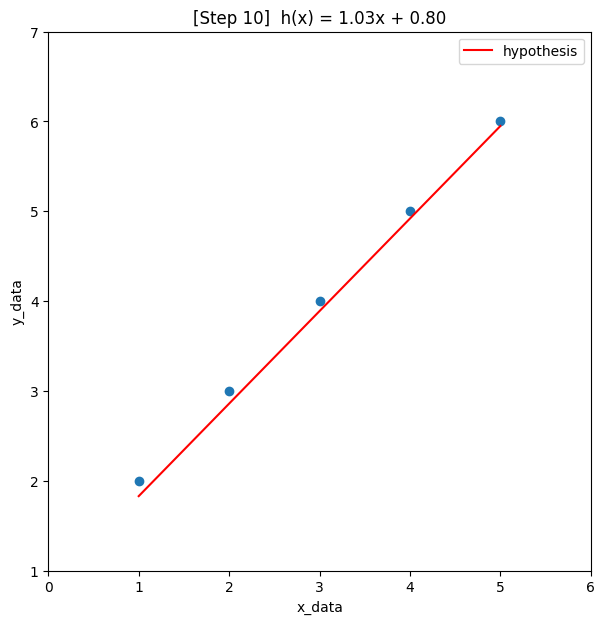

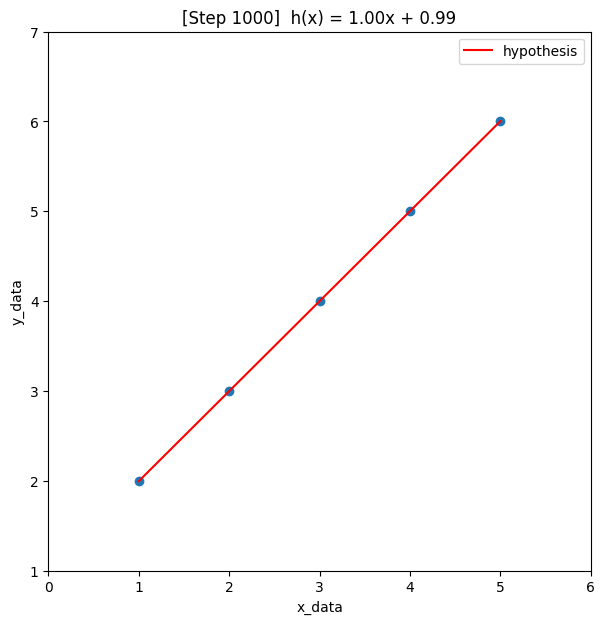

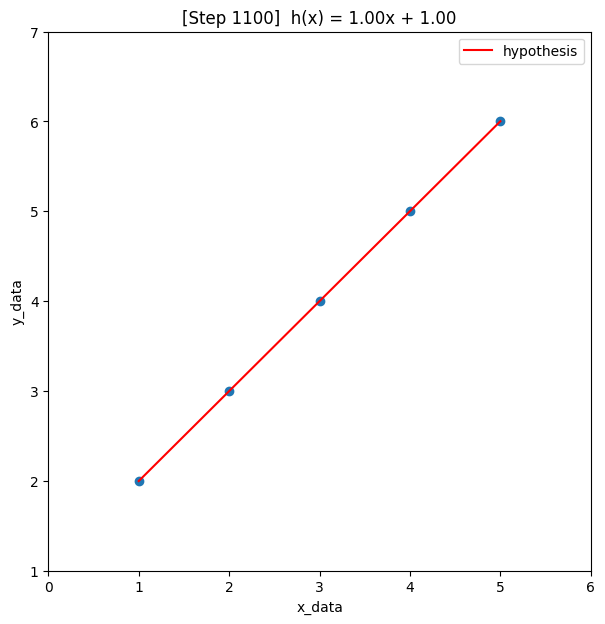

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

for i in range(1, 1101):
    with tf.GradientTape() as tape:
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b])
    w.assign_sub(learn_rate * dw) # a = a - b
    b.assign_sub(learn_rate * db)

    if i in [1, 3, 5, 10, 1000, 1100]:
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') # ⑥
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') # ⑦
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

In [ ]:
pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.7 MB/s eta 0:00:00


In [ ]:
# Packages
from pykrx import stock
from pykrx import bond
import pandas as pd

#KOSDAQ = stock.get_market_ticker_list(market="KOSDAQ") # 코스닥
#KOSPI = stock.get_market_ticker_list(market="KOSPI") # 코스피
#KONEX = stock.get_market_ticker_list(market="KONEX") # 코넥스
STOCK = stock.get_market_ticker_list(market="ALL") # 코스피

In [ ]:
# 회사 번호, 상장번호 데이터 프레임(한국 증권)
def return_name(market):
    Market = []
    for ticker in market:
        Value = stock.get_market_ticker_name(ticker)
        Market.append([Value,ticker])
    df = pd.DataFrame(Market,columns = ['회사명','상장번호'])
    return df

# DataFrame 상장기업 목록
STOCK_df = return_name(STOCK)

In [ ]:
STOCK_df

,회사명,상장번호
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS,054620
4,AP시스템,265520
...,...,...
2749,흥국화재,000540
2750,흥국화재우,000545
2751,흥아해운,003280
2752,희림,037440


In [ ]:
# Ticker -> Name
def return_num(company_name):
    for idx, ticker in enumerate(STOCK_df['회사명']):
        if ticker == company_name:
            return STOCK_df.loc[idx, '상장번호']
    return None

# 한 종목 시가 종가 저가 고가 거래량 거래금액 변동율 BPS PER EPS DIV DPS
def change_data(start, end, code):
    stock_name = stock.get_market_ohlcv_by_date(start, end, code)
    stock_name.columns = ['open', 'high', 'low', 'close', 'volume', 'amount']
    stock_name.rename_axis(mapper='date',axis=0, inplace = True)

    return stock_name

In [ ]:
return_num('삼성전자')

'005930'

In [ ]:
raw_df = change_data('20000101','20230425',return_num('삼성전자'))

In [ ]:
raw_df.head(3)

,open,high,low,close,volume,amount
date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,14.849624
2000-01-05,5800,6060,5520,5580,1493604,-8.674304
2000-01-06,5750,5780,5580,5620,1087810,0.716846


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
window_size = 10
data_size = 5

In [ ]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.7331118493901073, 0.6838842975199546, 0.7307262569824238, 0.1807537816599188, 0.7156451795618946], [0.7286821705418287, 0.6838842975199546, 0.7296089385466709, 0.16633760279764676, 0.7167780672927192], [0.7264673311176894, 0.6828512396687161, 0.7307262569824238, 0.1671095212014122, 0.7179109550235437], [0.7375415282383859, 0.688016528924909, 0.726256983239412, 0.17912938557901728, 0.7065820777152978], [0.7198228128452715, 0.677685950412523, 0.7229050279321532, 0.1493432503515234, 0.708847853176947], [0.7297895902538983, 0.6818181818174774, 0.7240223463679061, 0.1639097179365702, 0.7122465163694208], [0.7253599114056197, 0.6797520661150003, 0.7296089385466709, 0.1135690308316339, 0.7111136286385962], [0.7209302325573411, 0.6745867768588072, 0.7217877094964003, 0.10521062141740303, 0.708847853176947], [0.7286821705418287, 0.6807851239662388, 0.7307262569824238, 0.1166987945907619, 0.7133794041002454], [0.7231450719814805, 0.6787190082637616, 0.7240223463679061, 0.1438061208149691, 0.

In [ ]:
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=25, batch_size=30)
pred_y = model.predict(test_x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            640       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1491 (5.82 KB)
Trainable params: 1491 (5.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
135/135 [====

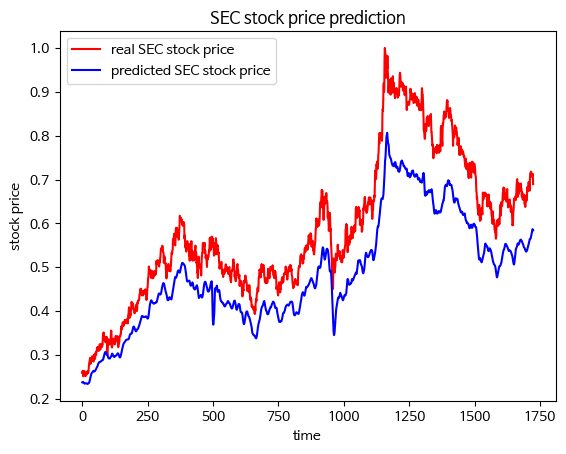

In [ ]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show();

In [ ]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')

Tomorrow's SEC price : [53903.7] KRW
